$
\newcommand{\RR}{\mathbf{R}}
\newcommand{\ZZ}{\mathbf{Z}}
\newcommand{\NN}{\mathbf{N}}
\newcommand{\e}{\mathrm{e}}
\newcommand{\eps}{\varepsilon}
$

# HW 2

Submitted 2/17/18 by Colton Grainger for Math-428: Numerical Methods, Spring 2018, UIdaho Engineering Outreach.

## Taylor Polynomials
### prob 1

Consider the function $f(x)=\cos(\pi x/2)$.

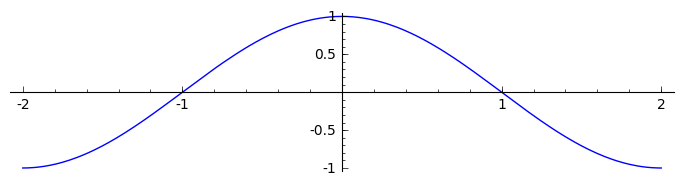

In [6]:
f = cos(pi*x/2)
p = f.plot((x, -2, 2))
p.show(figsize = [7, 2])

We expand $f(x)$ in a Taylor series about the point $x_0=0$.

Since (about $x = 0$)
$$
\cos x = \sum^{\infty}_{n=0} \frac{(-1)^n}{(2n)!} x^{2n} =  1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \cdots
$$
our Taylor expansion is just

In [13]:
f.series(x, 8)

1 + (-1/8*pi^2)*x^2 + (1/384*pi^4)*x^4 + (-1/46080*pi^6)*x^6 + Order(x^8)

In [15]:
# here's the 6th degree Taylor polynomial
f.taylor(x, 0, 6)

-1/46080*pi^6*x^6 + 1/384*pi^4*x^4 - 1/8*pi^2*x^2 + 1

We find an expression for the remainder $R_n = f - P_n$ between the function $f$ and its $n$th degree Taylor $P_n$ polynomial.

By Taylor's theorem, there exists an $\xi(x)$ between $x$ and the origin such that
$$
R_n(x) = \frac{x^{n+1}}{(n+1)!}f^{(n+1)}(\xi).
$$

Since $f(x) = \cos\frac\pi2 x$, we can express derivatives as 
$$
f^{(k)}(x) = (\pi/2)^k\cos\left(\frac\pi2(x + k)\right)
$$

In [46]:
# some evidence for the claim
for k in range(4):
    error(x) = f.diff(x, k) - (pi/2)^k*cos((pi/2)*(x + k))
    print bool(error == 0)

True
True
True
True


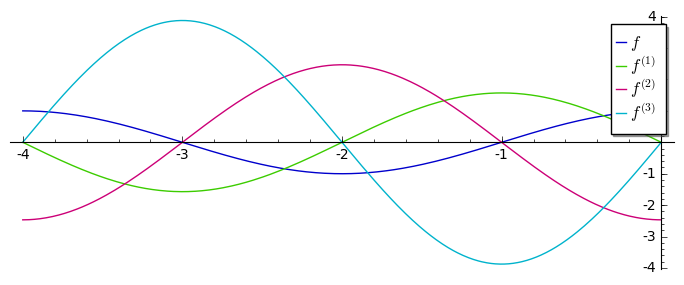

In [47]:
# and graphically, we see differentiation is just translation and scaling
plot([f.diff(x, k) for k in range(4)], (x, -4, 0), 
     legend_label = ['$f$','$f^{(1)}$', '$f^{(2)}$', '$f^{(3)}$'],
     figsize = [7,3])

Whence 
$$
R_n(x) = \frac{x^{n+1}}{(n+1)!}(\pi/2)^{(n+1)}\cos\left(\frac\pi2(\xi + n + 1)\right) \quad \text{for some $\xi$ between $x$ and the origin.}
$$

We estimate the number of terms required to guarantee <!---six-significant-digit---> 
accuracy for $f(x)$ within $10^{-5}$  for all $x$ in the interval $[-1, 1]$.

The error $\left|P_n(x) - f\right|$ is just $\left|R_n(x)\right|$.

Since $\cos \colon \RR \to [-1,1]$, for whatever $\xi$, we have the inequality 
$$
\left|R_n(x)\right| \leq \left|\frac{x^{n+1}}{(n+1)!}(\pi/2)^{(n+1)}\right|.
$$

Further, we notice 
$$ 
\max_{\substack{x \in [-1, 1]}} \left|\frac{x^{n+1}}{(n+1)!}(\pi/2)^{(n+1)}\right| = \frac{(\pi/2)^{(n+1)}}{(n+1)!}.
$$
which is our desired error bound. 

To find $n$ such that $\left|R_n(x)\right| \leq \eps$ with $\eps = 10^{-5}$, we iterate.

In [54]:
from math import factorial

n = 0; eps = 10**(-5)
error_bound = lambda n : ((pi/2)**(n+1))/factorial(n+1)

while error_bound(N) > eps:
    n += 1
n

0

Plot $f(x)$ and its 1st, 3rd, 5th and 7th degree Taylor polynomials
over $[-2, 2]$. (Use the Matlab command {\em subplot}
to generate a number of plots on the same page).